In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/2010~2023_water_level.csv')
rf = pd.read_csv('/content/drive/My Drive/서울 일별 강수량 (2010~2023).csv')


# data.to_csv('han_river_data(2010~2023).csv', encoding='utf-8', index=False)

observatory_codes = [1018640, 1018655, 1018658, 1018662, 1018669,
                     1018670, 1018675, 1018680, 1018683, 1018692,
                     1018695, 1018697, 1018698, 1019630]
observatory_codes = [str(code) for code in observatory_codes]

bridge_dict = {
    1018640: "Gwangjin Bridge", 1018655: "Daegok Bridge", 1018658: "Daechi Bridge",
    1018662: "Cheongdam Bridge", 1018669: "Changdong Bridge", 1018670: "Wolgye 2 Bridge",
    1018675: "Jungrang Bridge", 1018680: "Jamsu Bridge", 1018683: "Hangang Bridge",
    1018692: "Sinlim 5 Bridge", 1018695: "Neobu Bridge", 1018697: "Ogeum Bridge",
    1018698: "Sindae Bang 1 Bridge", 1019630: "Haengju Bridge"
}
bridge_names = [
    "Gwangjin Bridge", "Daegok Bridge", "Daechi Bridge", "Cheongdam Bridge",
    "Changdong Bridge", "Wolgye 2 Bridge", "Jungrang Bridge", "Jamsu Bridge",
    "Hangang Bridge", "Sinlim 5 Bridge", "Neobu Bridge", "Ogeum Bridge",
    "Sindae Bang 1 Bridge", "Haengju Bridge"
]

# observatory_codes 열의 값을 영어 다리 이름으로 대체
data['observatory'] = data['wlobscd'].map(bridge_dict)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rf.fillna(0, inplace=True)

In [ ]:
data['rf'] = 0
data

,fw,wl,wlobscd,ymdhm,observatory,rf
0,6.08,1.78,1018655,2010010100,Daegok Bridge,0
1,4.05,0.99,1018697,2010010100,Ogeum Bridge,0
2,0.76,0.12,1018695,2010010100,Neobu Bridge,0
3,NaN,NaN,1018692,2010010100,Sinlim 5 Bridge,0
4,NaN,NaN,1018698,2010010100,Sindae Bang 1 Bridge,0
...,...,...,...,...,...,...
1716997,9.00,0.80,1018697,2023123123,Ogeum Bridge,0
1716998,0.32,0.57,1018698,2023123123,Sindae Bang 1 Bridge,0
1716999,124.87,1.13,1018640,2023123123,Gwangjin Bridge,0
1717000,264.07,1.03,1018662,2023123123,Cheongdam Bridge,0


In [ ]:
data.isna().sum()

fw             548768
wl             361231
wlobscd             0
ymdhm               0
observatory         0
rf                  0
dtype: int64

In [ ]:
# for bridge_name in bridge_names:
#     df = data[data['observatory'] == bridge_name]
#     df['column_name'] = df['column_name'].fillna(method='bfill', limit=None)  # 뒤의 값으로 결측치를 채우되, 값이 나타날 때까지만 보간
#     data.loc[data['observatory'] == bridge_name] = df


In [ ]:
for bridge_name in data['observatory'].unique():
    df = data[data['observatory'] == bridge_name]
    mean_fw = df['fw'].mean()
    mean_wl = df['wl'].mean()
    df['fw'].fillna(mean_fw, inplace=True)
    df['wl'].fillna(mean_wl, inplace=True)
    data.loc[data['observatory'] == bridge_name] = df
data.isna().sum()

fw             122643
wl                  0
wlobscd             0
ymdhm               0
observatory         0
rf                  0
dtype: int64

In [ ]:
for bridge_name in bridge_names:
    df = data[data['observatory'] == bridge_name]
    print(f"Observatory: {bridge_name}")
    print(df.isna().sum())

Observatory: Gwangjin Bridge
fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
rf             0
dtype: int64
Observatory: Daegok Bridge
fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
rf             0
dtype: int64
Observatory: Daechi Bridge
fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
rf             0
dtype: int64
Observatory: Cheongdam Bridge
fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
rf             0
dtype: int64
Observatory: Changdong Bridge
fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
rf             0
dtype: int64
Observatory: Wolgye 2 Bridge
fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
rf             0
dtype: int64
Observatory: Jungrang Bridge
fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
rf             0
dtype: 

In [ ]:
# data.dropna(inplace=True)

In [ ]:
data['datetime'] = pd.to_datetime(data['ymdhm'], format='%Y%m%d%H')
data['date'] = data['datetime'].dt.date
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour

data

,fw,wl,wlobscd,ymdhm,observatory,rf,datetime,date,year,month,day,hour
0,6.080000,1.780000,1018655,2010010100,Daegok Bridge,0,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
1,4.050000,0.990000,1018697,2010010100,Ogeum Bridge,0,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
2,0.760000,0.120000,1018695,2010010100,Neobu Bridge,0,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
3,NaN,2.507918,1018692,2010010100,Sinlim 5 Bridge,0,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
4,0.713282,0.578304,1018698,2010010100,Sindae Bang 1 Bridge,0,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1716997,9.000000,0.800000,1018697,2023123123,Ogeum Bridge,0,2023-12-31 23:00:00,2023-12-31,2023,12,31,23
1716998,0.320000,0.570000,1018698,2023123123,Sindae Bang 1 Bridge,0,2023-12-31 23:00:00,2023-12-31,2023,12,31,23
1716999,124.870000,1.130000,1018640,2023123123,Gwangjin Bridge,0,2023-12-31 23:00:00,2023-12-31,2023,12,31,23
1717000,264.070000,1.030000,1018662,2023123123,Cheongdam Bridge,0,2023-12-31 23:00:00,2023-12-31,2023,12,31,23


In [ ]:
rf.rename(columns={'datetime' : 'date'}, inplace=True)
rf

,date,location,precipitation(mm)
0,2010-01-01,108,0.0
1,2010-01-02,108,1.4
2,2010-01-03,108,0.0
3,2010-01-04,108,14.2
4,2010-01-05,108,0.0
...,...,...,...
5108,2023-12-27,108,0.0
5109,2023-12-28,108,0.0
5110,2023-12-29,108,0.0
5111,2023-12-30,108,13.1


In [ ]:
# for bridge_name in data['observatory'].unique():
#     for i in range(rf.shape[0]):
#         target = rf.loc[i]
#         if target['date'] in data[data['observatory'] == bridge_name]['date'].values:
#             data.loc[(data['observatory'] == bridge_name) & (data['date'] == target['date']), 'rf'] += target['precipitation(mm)']

# data

In [ ]:
data

,fw,wl,wlobscd,ymdhm,observatory,rf,datetime,date,year,month,day,hour
0,6.080000,1.780000,1018655,2010010100,Daegok Bridge,0,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
1,4.050000,0.990000,1018697,2010010100,Ogeum Bridge,0,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
2,0.760000,0.120000,1018695,2010010100,Neobu Bridge,0,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
3,NaN,2.507918,1018692,2010010100,Sinlim 5 Bridge,0,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
4,0.713282,0.578304,1018698,2010010100,Sindae Bang 1 Bridge,0,2010-01-01 00:00:00,2010-01-01,2010,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1716997,9.000000,0.800000,1018697,2023123123,Ogeum Bridge,0,2023-12-31 23:00:00,2023-12-31,2023,12,31,23
1716998,0.320000,0.570000,1018698,2023123123,Sindae Bang 1 Bridge,0,2023-12-31 23:00:00,2023-12-31,2023,12,31,23
1716999,124.870000,1.130000,1018640,2023123123,Gwangjin Bridge,0,2023-12-31 23:00:00,2023-12-31,2023,12,31,23
1717000,264.070000,1.030000,1018662,2023123123,Cheongdam Bridge,0,2023-12-31 23:00:00,2023-12-31,2023,12,31,23


In [ ]:
is_outlier = []
for bridge_name in data['observatory'].unique():
    df = data[data['observatory'] == bridge_name]
    level = df['wl']
    z_scores = (level - level.mean()) / level.std()
    threshold = 3  # 임계값 설정 (일반적으로 3을 사용)

    # 이상치를 나타내는 이진 피처 생성
    is_outlier.append(np.abs(z_scores) > threshold)
is_outlier = pd.concat(is_outlier, ignore_index=True)
is_outlier

0          False
1          False
2          False
3          False
4          False
           ...  
1716997    False
1716998    False
1716999    False
1717000    False
1717001    False
Name: wl, Length: 1717002, dtype: bool

In [ ]:
data['is_outlier'] = is_outlier

In [ ]:
for bridge_name in bridge_names:
    df = data[data['observatory'] == bridge_name]
    outlier_ratio = df['is_outlier'].sum() / len(df)
    print(f"Observatory: {bridge_name}, Outlier Ratio: {outlier_ratio:.2%}")

Observatory: Gwangjin Bridge, Outlier Ratio: 1.50%
Observatory: Daegok Bridge, Outlier Ratio: 1.50%
Observatory: Daechi Bridge, Outlier Ratio: 1.51%
Observatory: Cheongdam Bridge, Outlier Ratio: 1.50%
Observatory: Changdong Bridge, Outlier Ratio: 1.51%
Observatory: Wolgye 2 Bridge, Outlier Ratio: 1.49%
Observatory: Jungrang Bridge, Outlier Ratio: 1.51%
Observatory: Jamsu Bridge, Outlier Ratio: 1.52%
Observatory: Hangang Bridge, Outlier Ratio: 1.47%
Observatory: Sinlim 5 Bridge, Outlier Ratio: 1.49%
Observatory: Neobu Bridge, Outlier Ratio: 1.49%
Observatory: Ogeum Bridge, Outlier Ratio: 1.51%
Observatory: Sindae Bang 1 Bridge, Outlier Ratio: 1.48%
Observatory: Haengju Bridge, Outlier Ratio: 1.50%


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

fw             0
wl             0
wlobscd        0
ymdhm          0
observatory    0
rf             0
datetime       0
date           0
year           0
month          0
day            0
hour           0
is_outlier     0
dtype: int64

In [ ]:
# rf 데이터프레임을 datetime 형식으로 변환
rf['datetime'] = pd.to_datetime(rf['date'])

# 각 날짜에 대해 24시간 동안의 강수량을 생성하고 시간 정보 설정
rf_full_day = pd.DataFrame(columns=['datetime', 'precipitation(mm)'])
for date in rf['date'].unique():
    date_data = pd.DataFrame()
    date_data['datetime'] = pd.date_range(start=date, periods=24, freq='H')
    date_data['precipitation(mm)'] = rf.loc[rf['date'] == date, 'precipitation(mm)'].values[0]
    rf_full_day = pd.concat([rf_full_day, date_data])

# 필요한 열만 선택하여 출력
rf_full_day.reset_index(drop=True, inplace=True)
print(rf_full_day)


                  datetime  precipitation(mm)
0      2010-01-01 00:00:00                0.0
1      2010-01-01 01:00:00                0.0
2      2010-01-01 02:00:00                0.0
3      2010-01-01 03:00:00                0.0
4      2010-01-01 04:00:00                0.0
...                    ...                ...
122707 2023-12-31 19:00:00                4.7
122708 2023-12-31 20:00:00                4.7
122709 2023-12-31 21:00:00                4.7
122710 2023-12-31 22:00:00                4.7
122711 2023-12-31 23:00:00                4.7

[122712 rows x 2 columns]


In [ ]:
observatory_list = []
for observatory in data['observatory'].unique():
    df = data[data['observatory'] == observatory]
    merged_data = pd.merge(df, rf_full_day, on='datetime', how='left')
    observatory_list.append(merged_data)

result_df = pd.concat(observatory_list)
print(result_df)

            fw    wl  wlobscd       ymdhm      observatory  rf  \
0         6.08  1.78  1018655  2010010100    Daegok Bridge   0   
1         6.08  1.78  1018655  2010010101    Daegok Bridge   0   
2         6.08  1.78  1018655  2010010102    Daegok Bridge   0   
3         6.08  1.78  1018655  2010010103    Daegok Bridge   0   
4         6.08  1.78  1018655  2010010104    Daegok Bridge   0   
...        ...   ...      ...         ...              ...  ..   
122638  128.90  1.13  1018640  2023123119  Gwangjin Bridge   0   
122639  124.87  1.13  1018640  2023123120  Gwangjin Bridge   0   
122640  124.87  1.13  1018640  2023123121  Gwangjin Bridge   0   
122641  128.90  1.13  1018640  2023123122  Gwangjin Bridge   0   
122642  124.87  1.13  1018640  2023123123  Gwangjin Bridge   0   

                  datetime        date  year  month  day  hour  is_outlier  \
0      2010-01-01 00:00:00  2010-01-01  2010      1    1     0       False   
1      2010-01-01 01:00:00  2010-01-01  2010      1

In [ ]:
data = result_df

In [ ]:
data

,fw,wl,wlobscd,ymdhm,observatory,rf,datetime,date,year,month,day,hour,is_outlier,precipitation(mm)
0,6.08,1.78,1018655,2010010100,Daegok Bridge,0,2010-01-01 00:00:00,2010-01-01,2010,1,1,0,False,0.0
1,6.08,1.78,1018655,2010010101,Daegok Bridge,0,2010-01-01 01:00:00,2010-01-01,2010,1,1,1,False,0.0
2,6.08,1.78,1018655,2010010102,Daegok Bridge,0,2010-01-01 02:00:00,2010-01-01,2010,1,1,2,False,0.0
3,6.08,1.78,1018655,2010010103,Daegok Bridge,0,2010-01-01 03:00:00,2010-01-01,2010,1,1,3,False,0.0
4,6.08,1.78,1018655,2010010104,Daegok Bridge,0,2010-01-01 04:00:00,2010-01-01,2010,1,1,4,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122638,128.90,1.13,1018640,2023123119,Gwangjin Bridge,0,2023-12-31 19:00:00,2023-12-31,2023,12,31,19,False,4.7
122639,124.87,1.13,1018640,2023123120,Gwangjin Bridge,0,2023-12-31 20:00:00,2023-12-31,2023,12,31,20,False,4.7
122640,124.87,1.13,1018640,2023123121,Gwangjin Bridge,0,2023-12-31 21:00:00,2023-12-31,2023,12,31,21,False,4.7
122641,128.90,1.13,1018640,2023123122,Gwangjin Bridge,0,2023-12-31 22:00:00,2023-12-31,2023,12,31,22,False,4.7


In [ ]:
# data.to_csv('han_river_data(2010~2023)_with_rf.csv', encoding='utf-8', index=False)

In [ ]:
# data.to_csv('HanRiver(2010~2023).csv', encoding='utf-8', index=False)

In [ ]:
# for bridge_name in bridge_names:
#     df = data[data['observatory'] == bridge_name]
#     print(f"Observatory: {bridge_name}")
#     print(df.isna().sum())a

In [ ]:
num_features = len(bridge_names)
num_rows = 7
num_cols = (num_features + num_rows - 1) // num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,10))
# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols)

for i, bridge in enumerate(bridge_names):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.pointplot(x='datetime', y='wl', data=df, ax=axes[row, col])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('River Levels by Observatory')
plt.tight_layout()
plt.show()

Gwangjin Bridge Complite


Gwangjin Bridge Complite
Daegok Bridge Complite
Daechi Bridge Complite
Cheongdam Bridge Complite
Changdong Bridge Complite
Wolgye 2 Bridge Complite
Jungrang Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Sinlim 5 Bridge Complite
Neobu Bridge Complite
Ogeum Bridge Complite
Sindae Bang 1 Bridge Complite
Haengju Bridge Complite


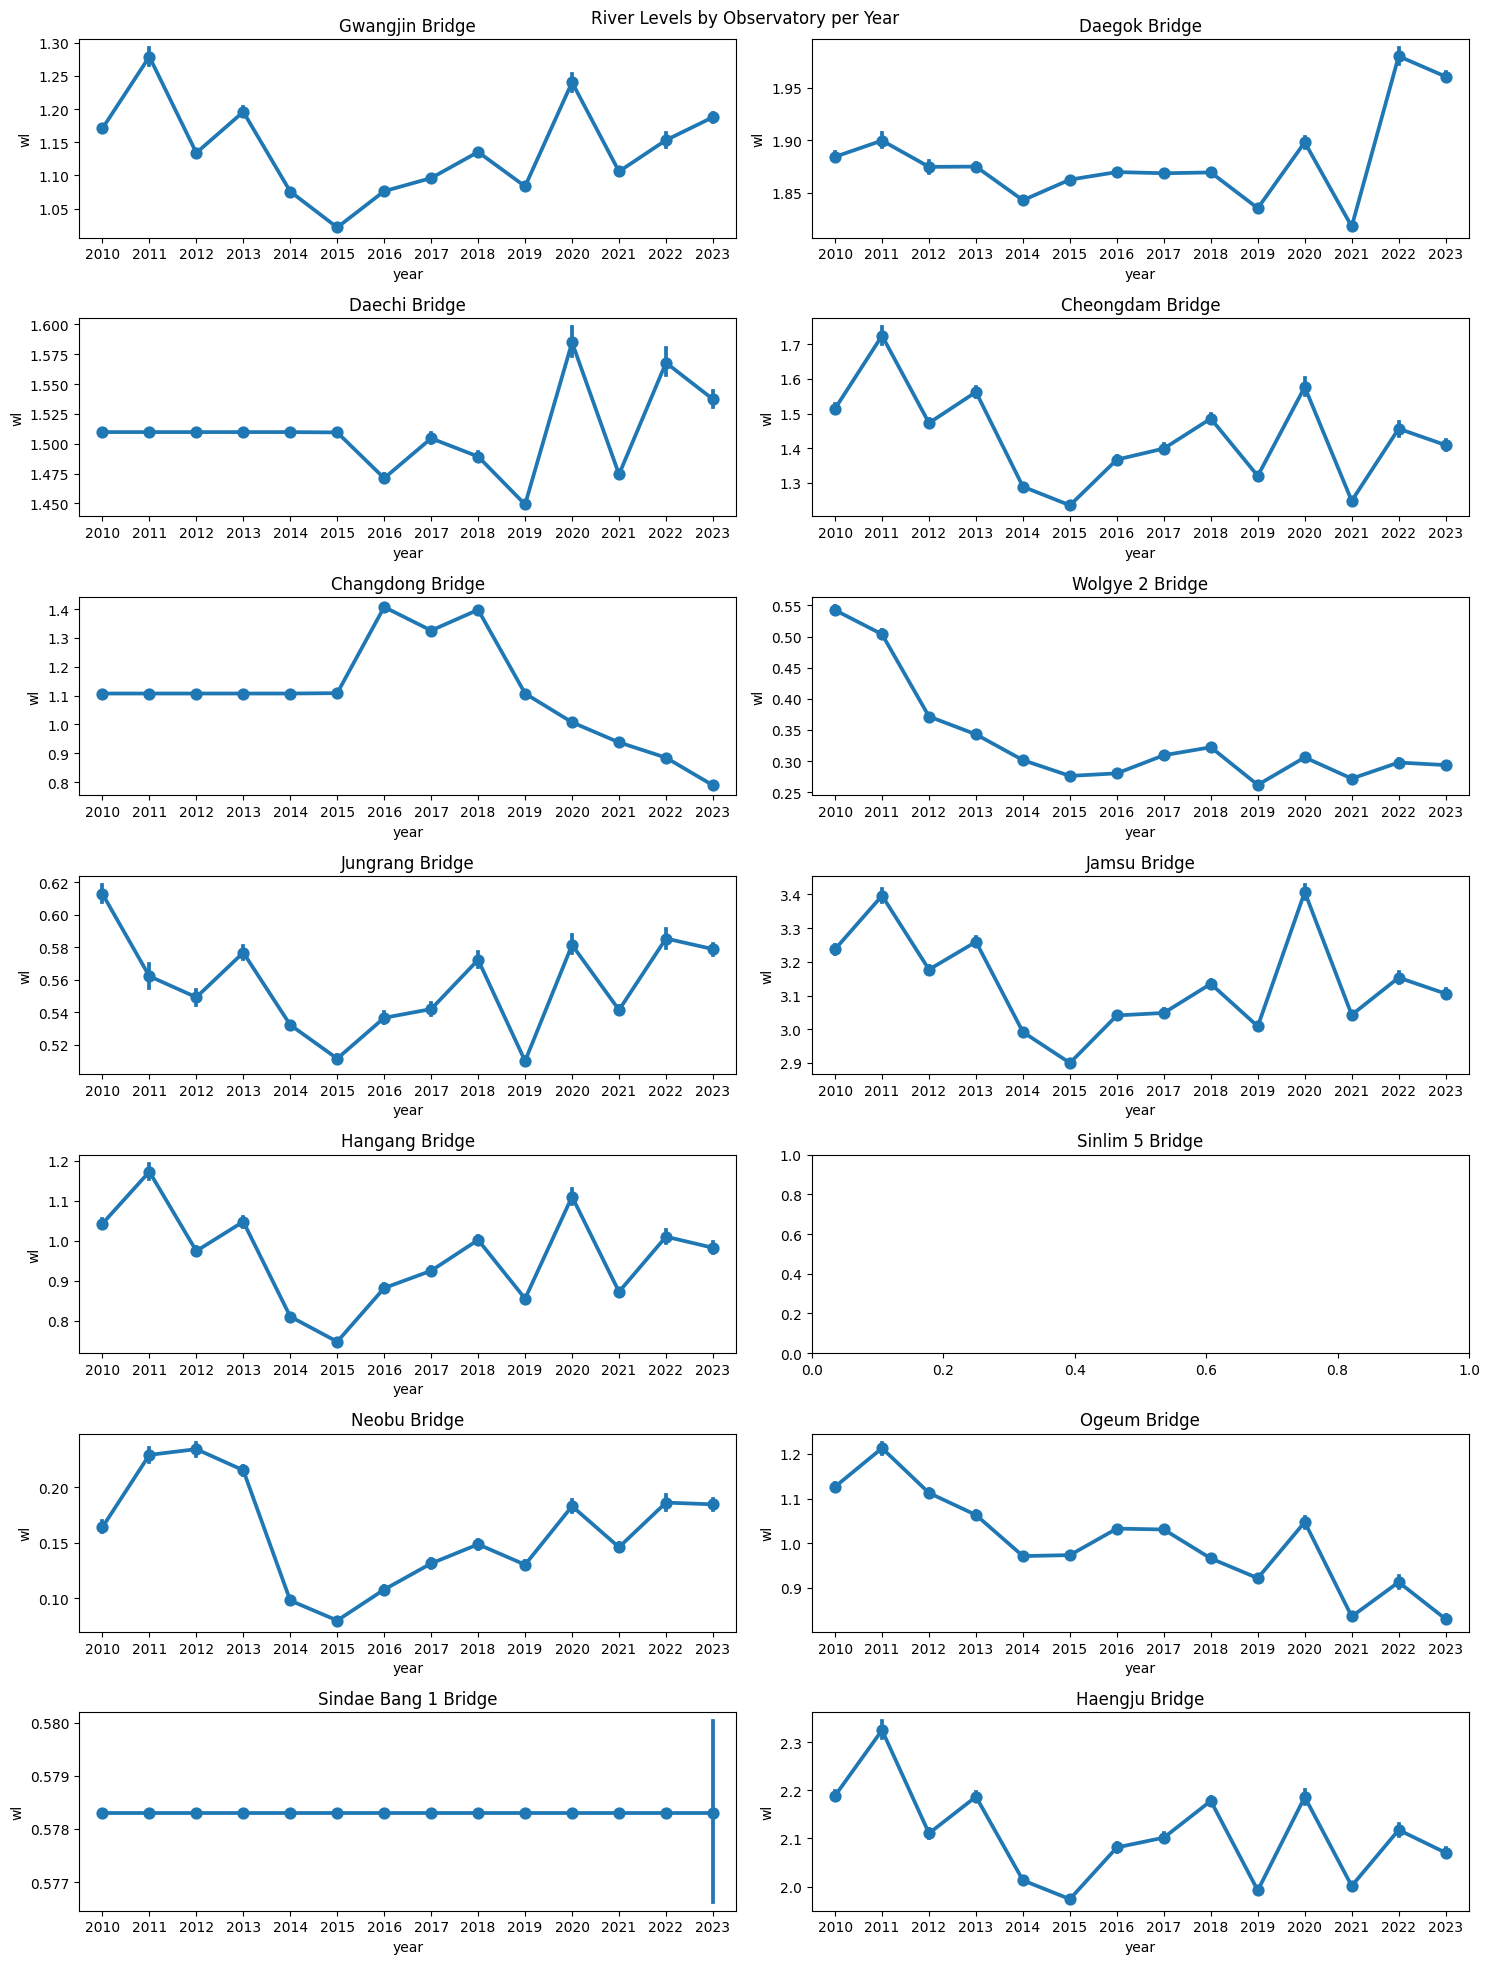

In [ ]:
num_features = len(bridge_names)
num_rows = 7
num_cols = (num_features + num_rows - 1) // num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))
# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols)

for i, bridge in enumerate(bridge_names):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.pointplot(x='year', y='wl', data=df, ax=axes[row, col])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('River Levels by Observatory per Year')
plt.tight_layout()
plt.show()

Gwangjin Bridge Complite
Daegok Bridge Complite
Daechi Bridge Complite
Cheongdam Bridge Complite
Changdong Bridge Complite
Wolgye 2 Bridge Complite
Jungrang Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Sinlim 5 Bridge Complite
Neobu Bridge Complite
Ogeum Bridge Complite
Sindae Bang 1 Bridge Complite
Haengju Bridge Complite


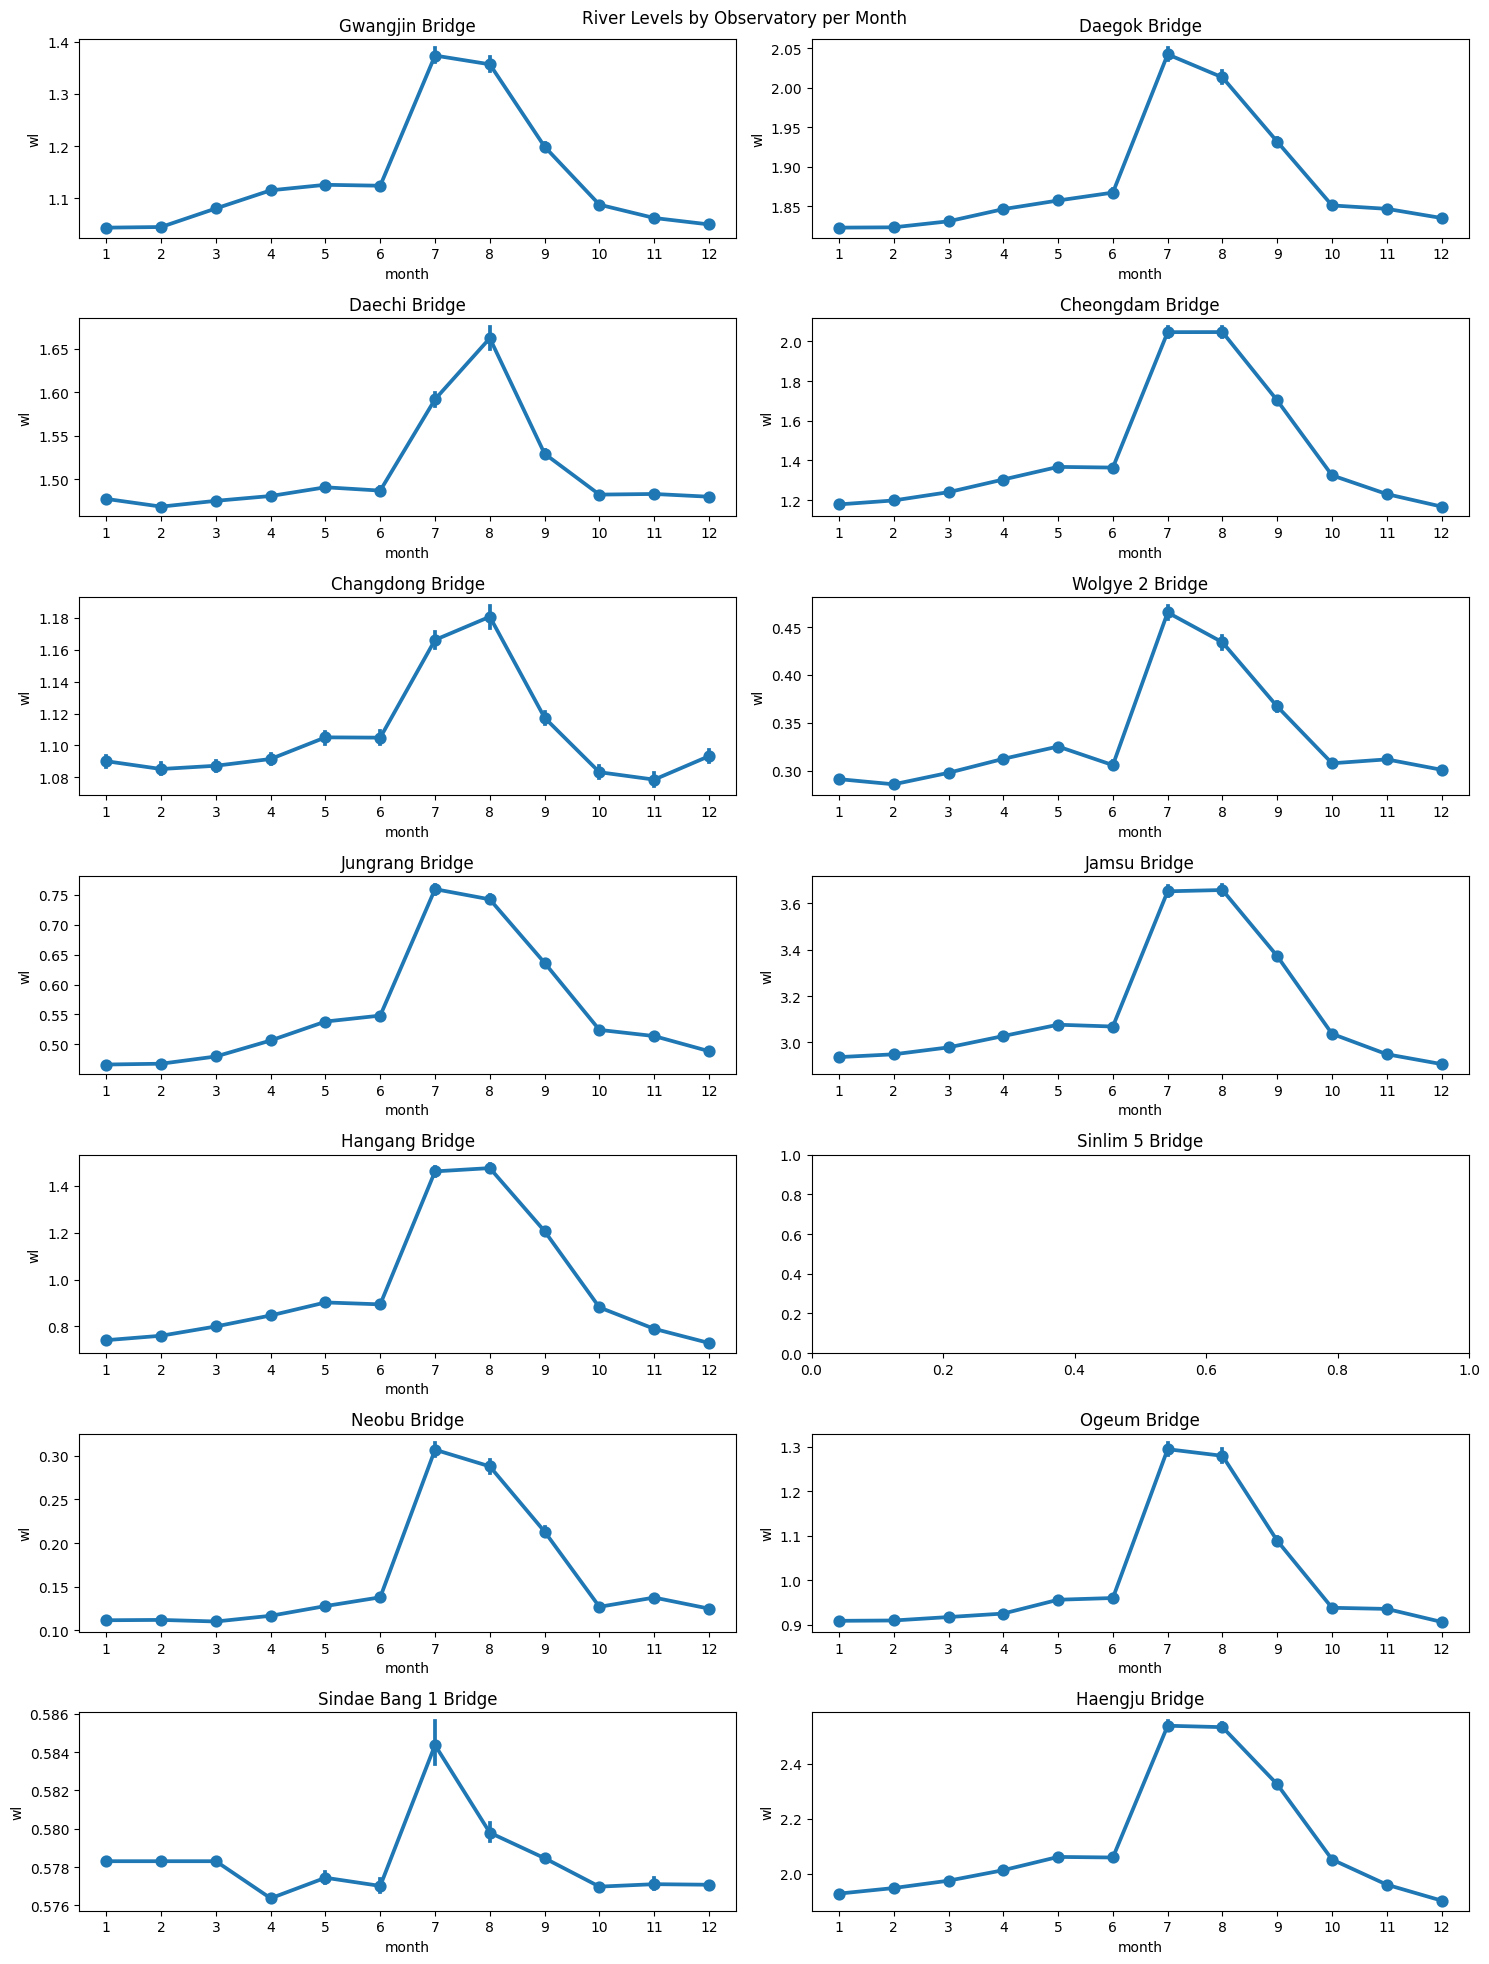

In [ ]:
num_features = len(bridge_names)
num_rows = 7
num_cols = (num_features + num_rows - 1) // num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(bridge_names):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.pointplot(x='month', y='wl', data=df, ax=axes[row, col])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('River Levels by Observatory per Month')
plt.tight_layout()
plt.show()

Gwangjin Bridge Complite
Daegok Bridge Complite
Daechi Bridge Complite
Cheongdam Bridge Complite
Changdong Bridge Complite
Wolgye 2 Bridge Complite
Jungrang Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Sinlim 5 Bridge Complite
Neobu Bridge Complite
Ogeum Bridge Complite
Sindae Bang 1 Bridge Complite
Haengju Bridge Complite


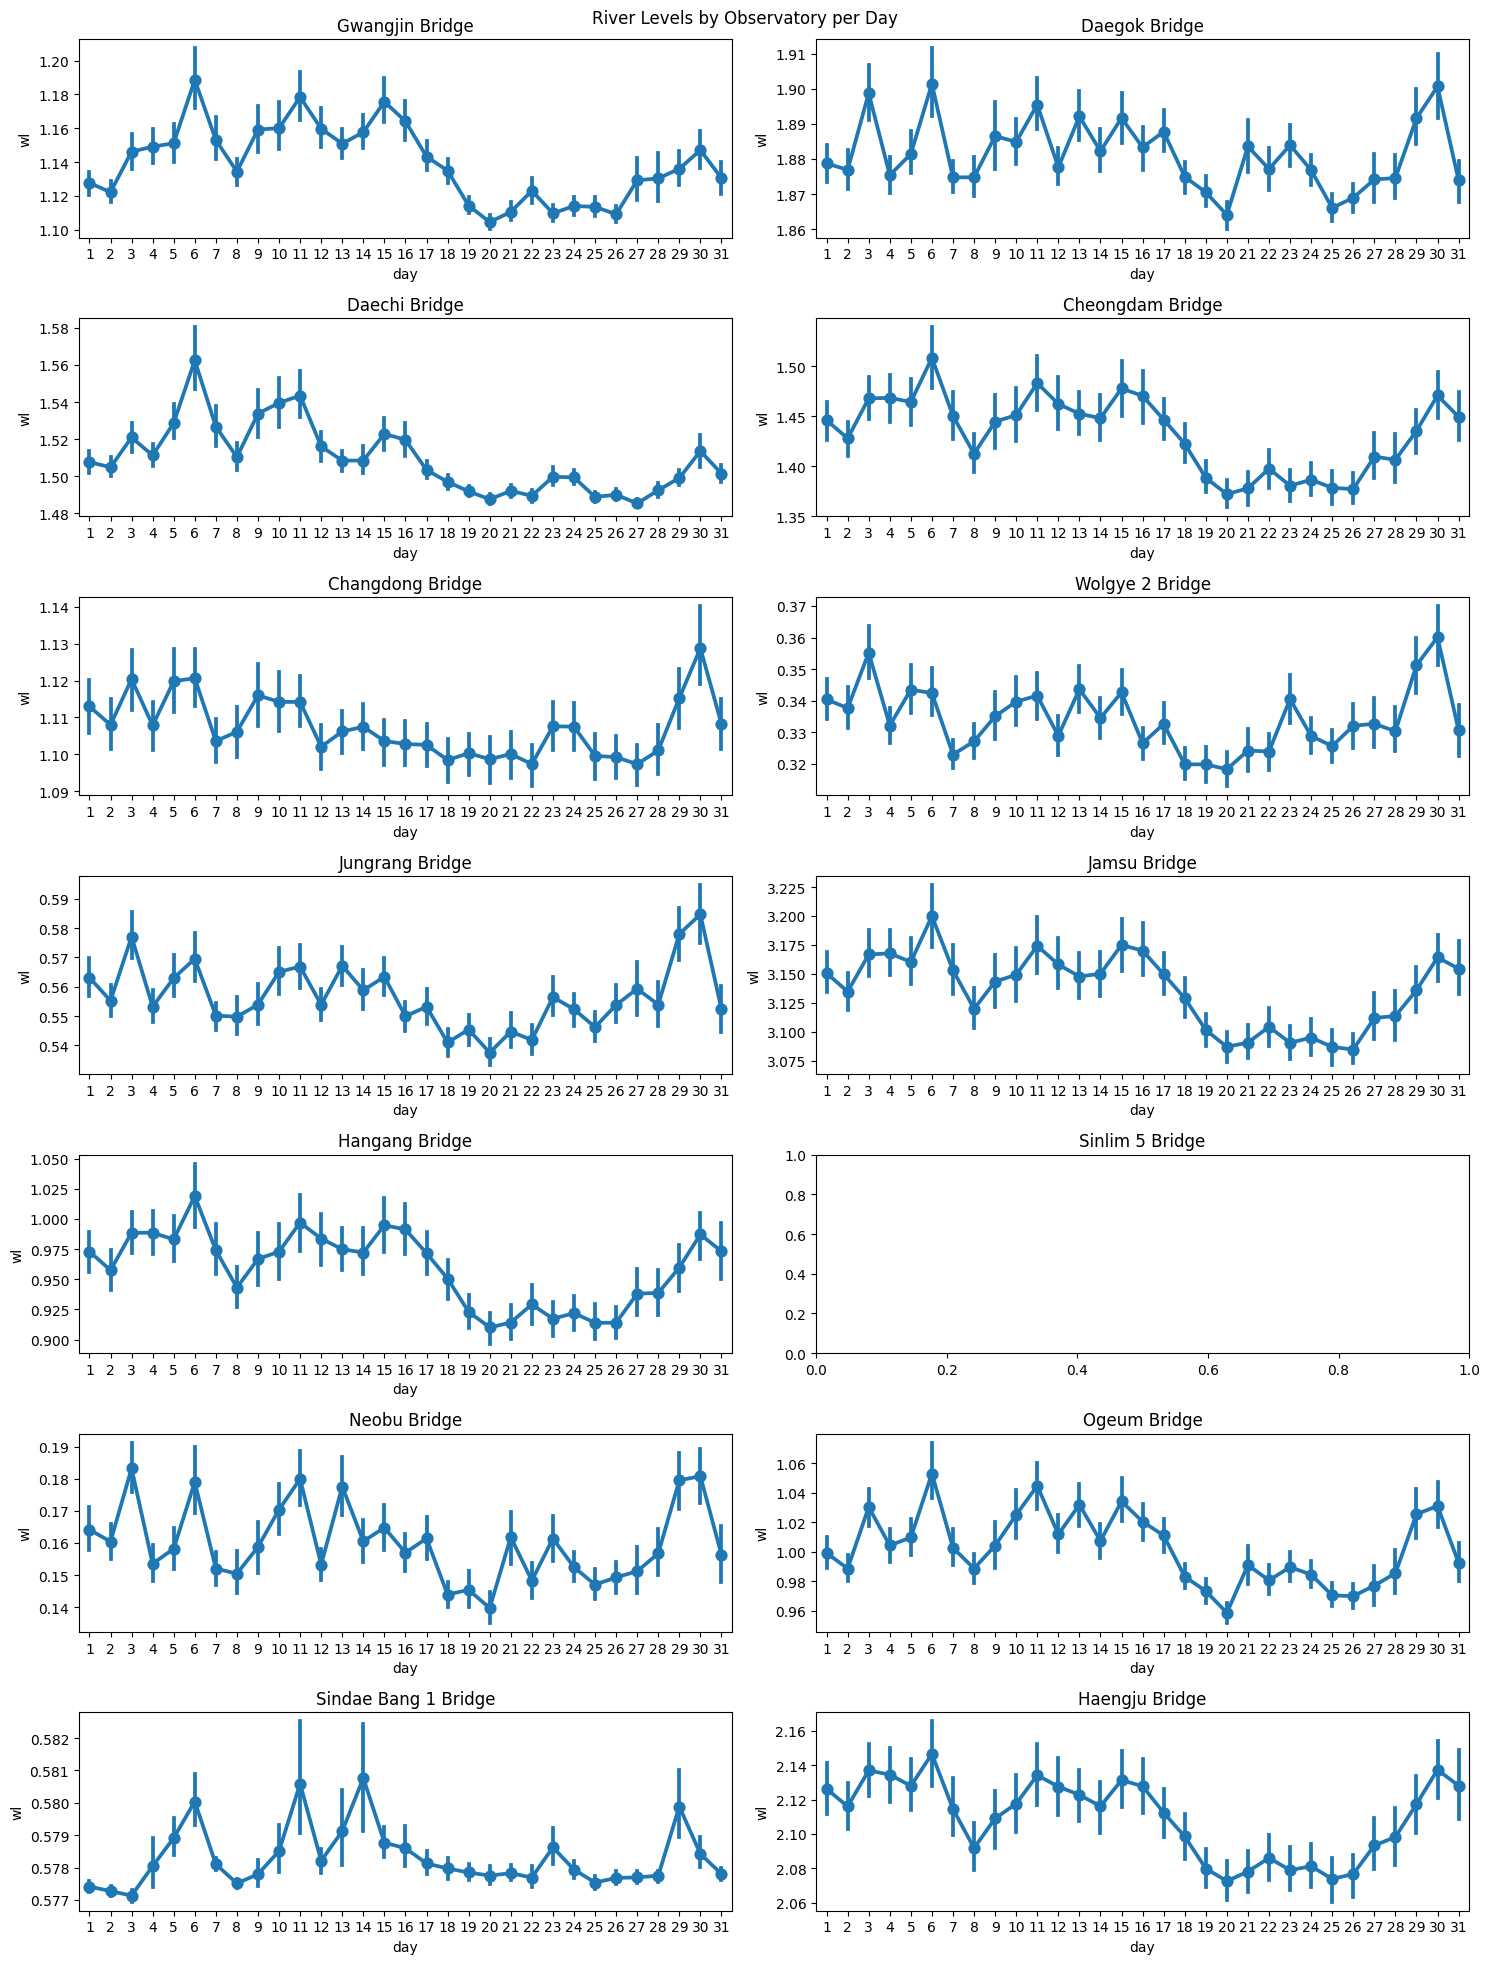

In [ ]:
num_features = len(bridge_names)
num_rows = 7
num_cols = (num_features + num_rows - 1) // num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(bridge_names):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.pointplot(x='day', y='wl', data=df, ax=axes[row, col])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('River Levels by Observatory per Day')
plt.tight_layout()
plt.show()

Gwangjin Bridge Complite
Daegok Bridge Complite
Daechi Bridge Complite
Cheongdam Bridge Complite
Changdong Bridge Complite
Wolgye 2 Bridge Complite
Jungrang Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Sinlim 5 Bridge Complite
Neobu Bridge Complite
Ogeum Bridge Complite
Sindae Bang 1 Bridge Complite
Haengju Bridge Complite


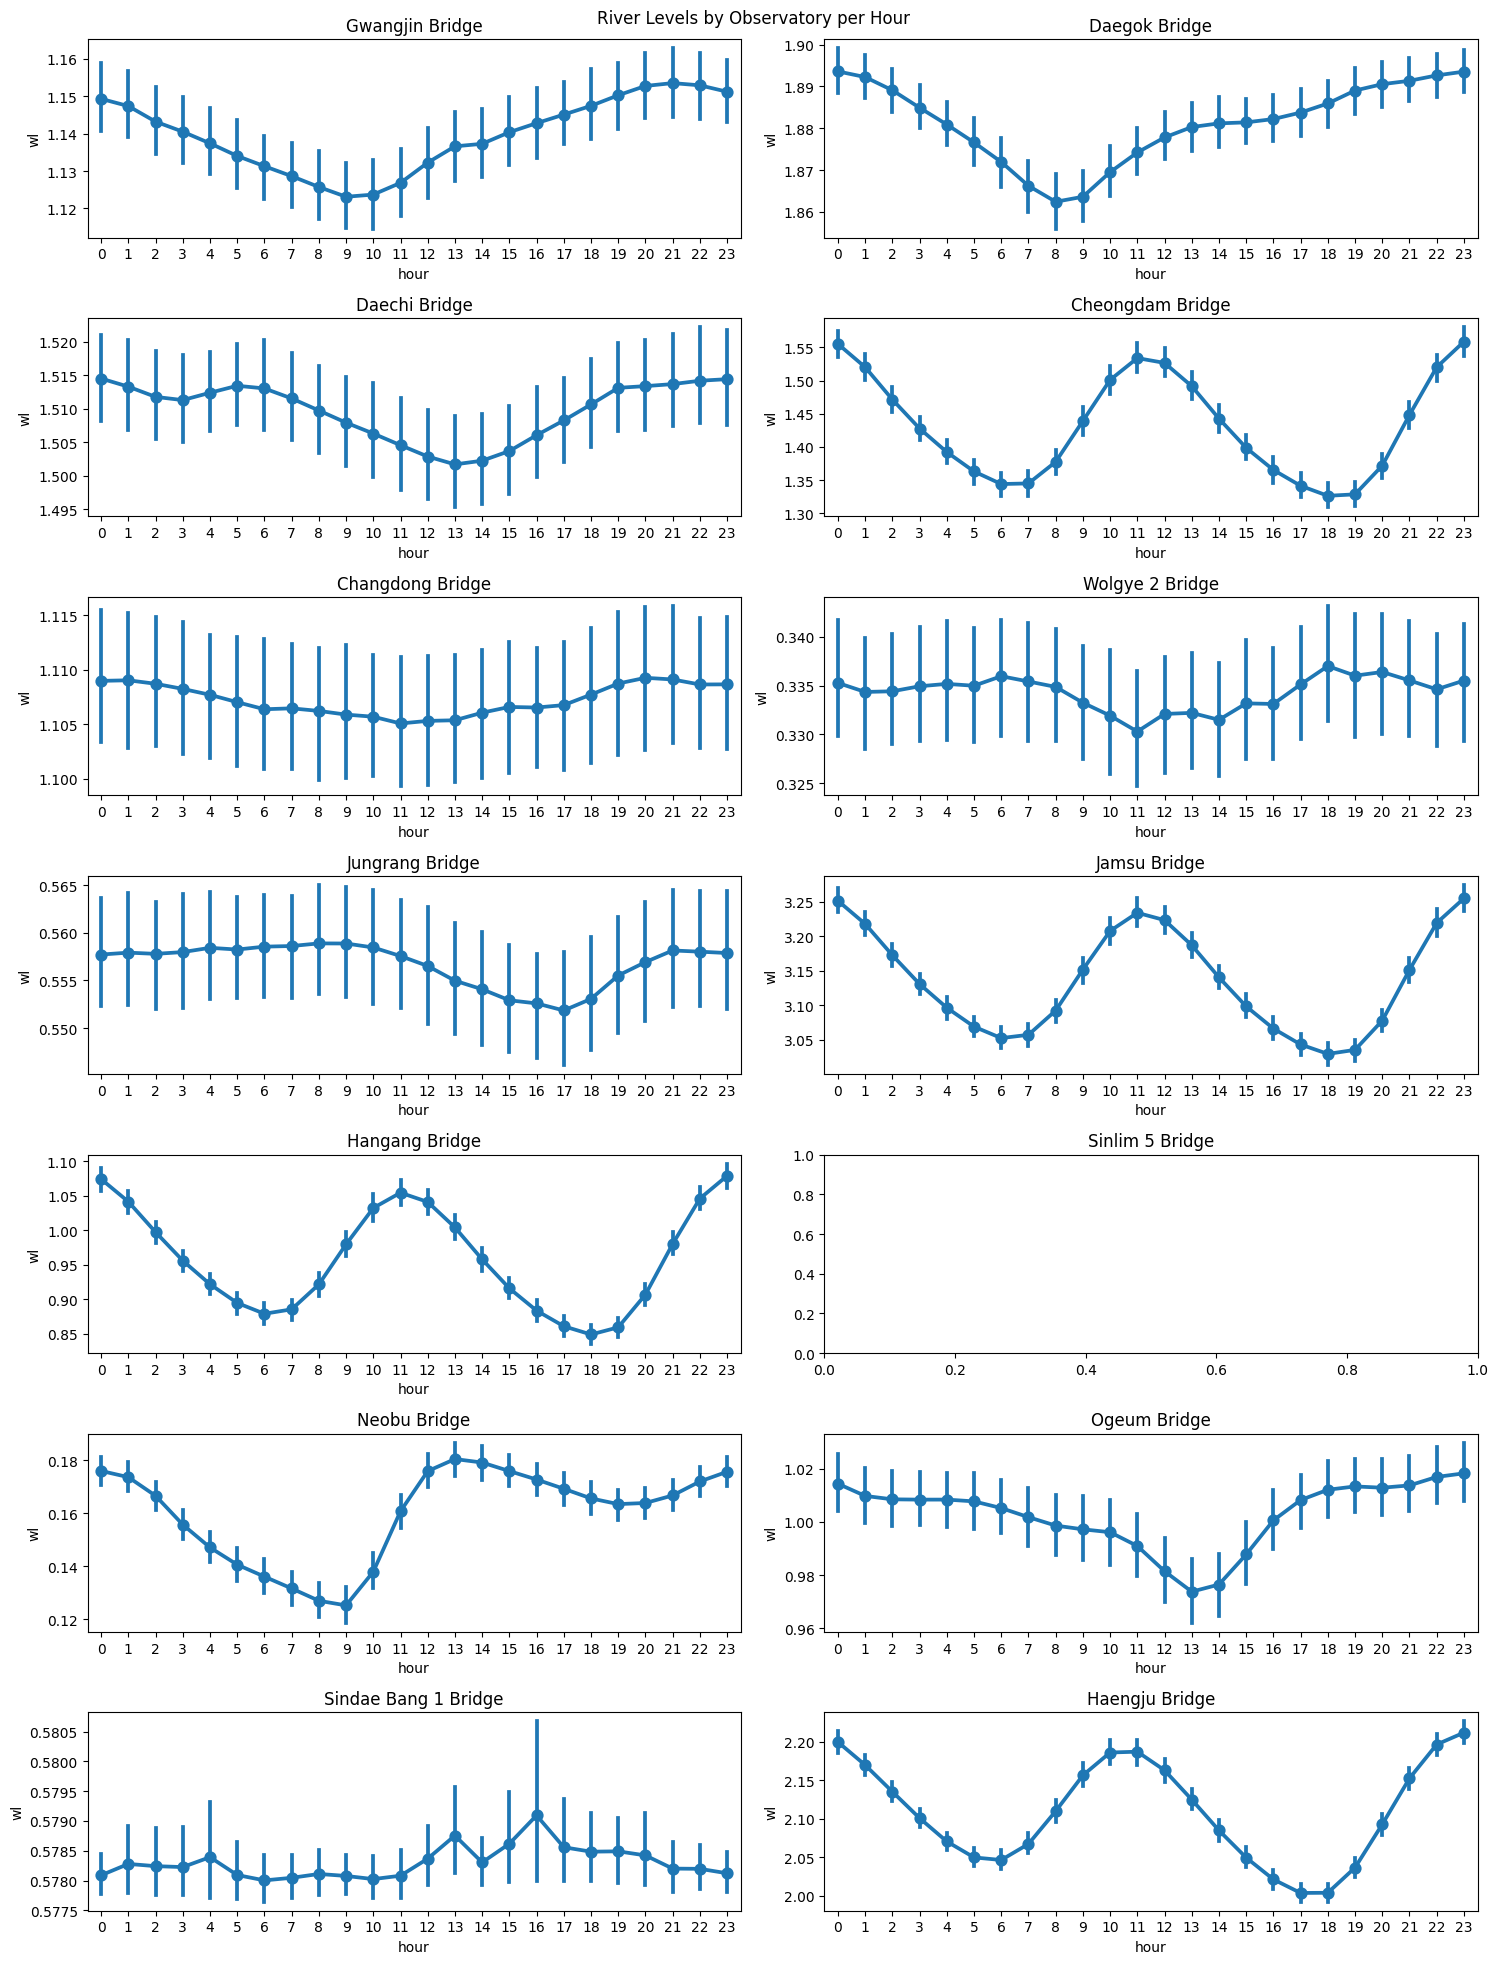

In [ ]:
num_features = len(bridge_names)
num_rows = 7
num_cols = (num_features + num_rows - 1) // num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(bridge_names):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.pointplot(x='hour', y='wl', data=df, ax=axes[row, col])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('River Levels by Observatory per Hour')
plt.tight_layout()
plt.show()

Gwangjin Bridge Complite
Daegok Bridge Complite
Daechi Bridge Complite
Cheongdam Bridge Complite
Changdong Bridge Complite
Wolgye 2 Bridge Complite
Jungrang Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Sinlim 5 Bridge Complite
Neobu Bridge Complite
Ogeum Bridge Complite
Sindae Bang 1 Bridge Complite
Haengju Bridge Complite


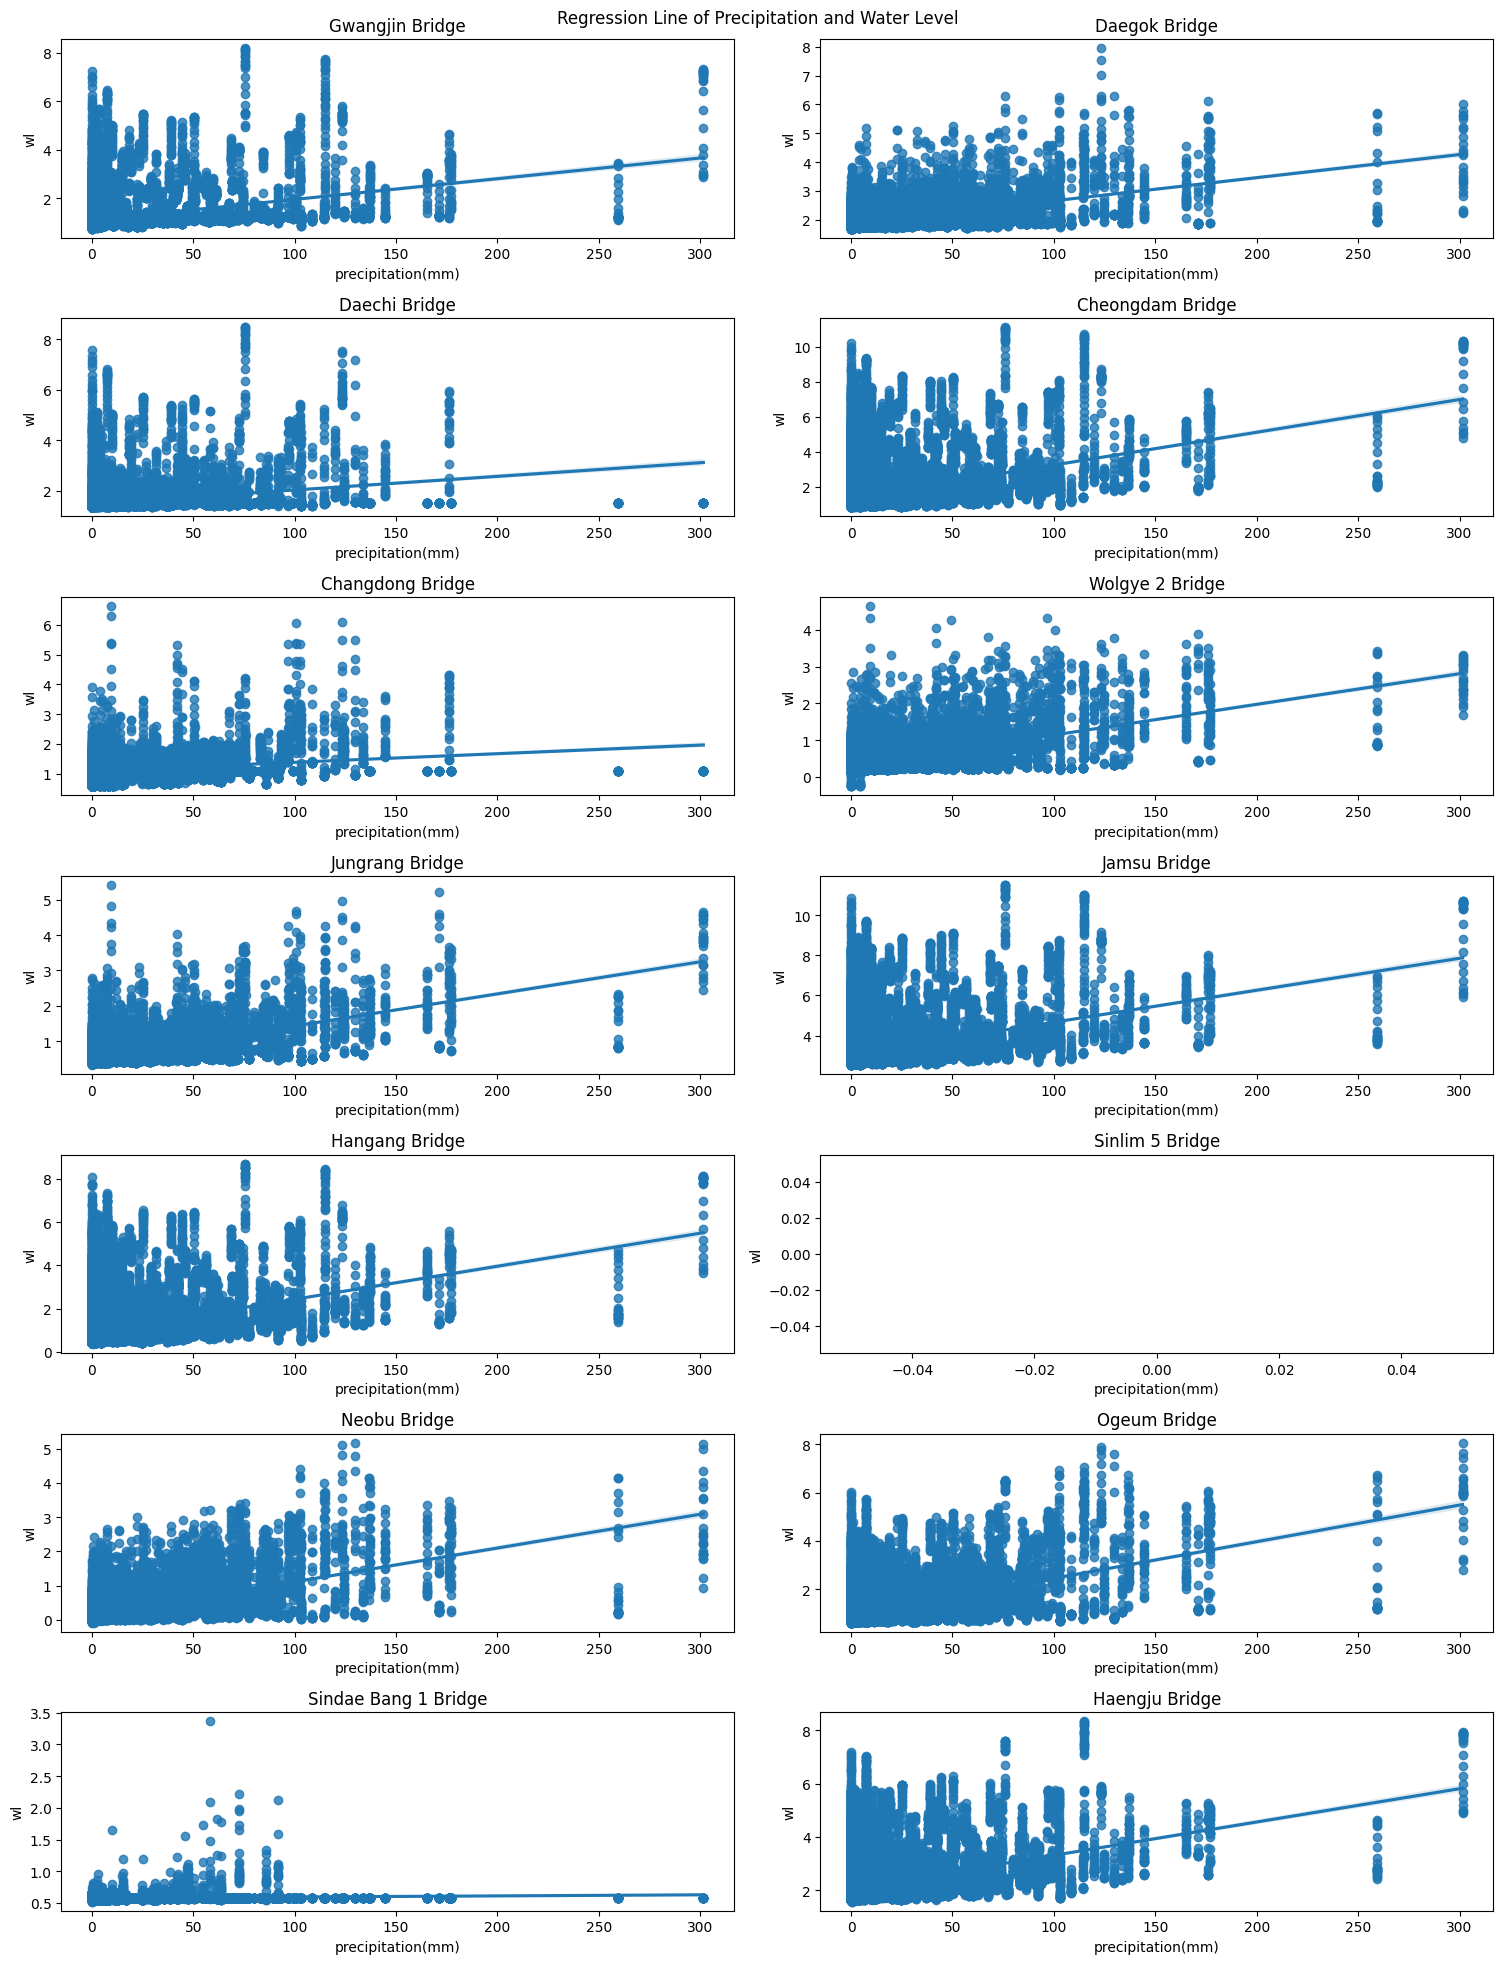

In [ ]:
num_features = len(bridge_names)
num_rows = 7
num_cols = (num_features + num_rows - 1) // num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(bridge_names):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.regplot(x='precipitation(mm)', y='wl', data=df, ax=axes[row, col])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('Regression Line of Precipitation and Water Level')
plt.tight_layout()
plt.show()

Gwangjin Bridge Complite
Daegok Bridge Complite
Daechi Bridge Complite
Cheongdam Bridge Complite
Changdong Bridge Complite
Wolgye 2 Bridge Complite
Jungrang Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Sinlim 5 Bridge Complite
Neobu Bridge Complite
Ogeum Bridge Complite
Sindae Bang 1 Bridge Complite
Haengju Bridge Complite


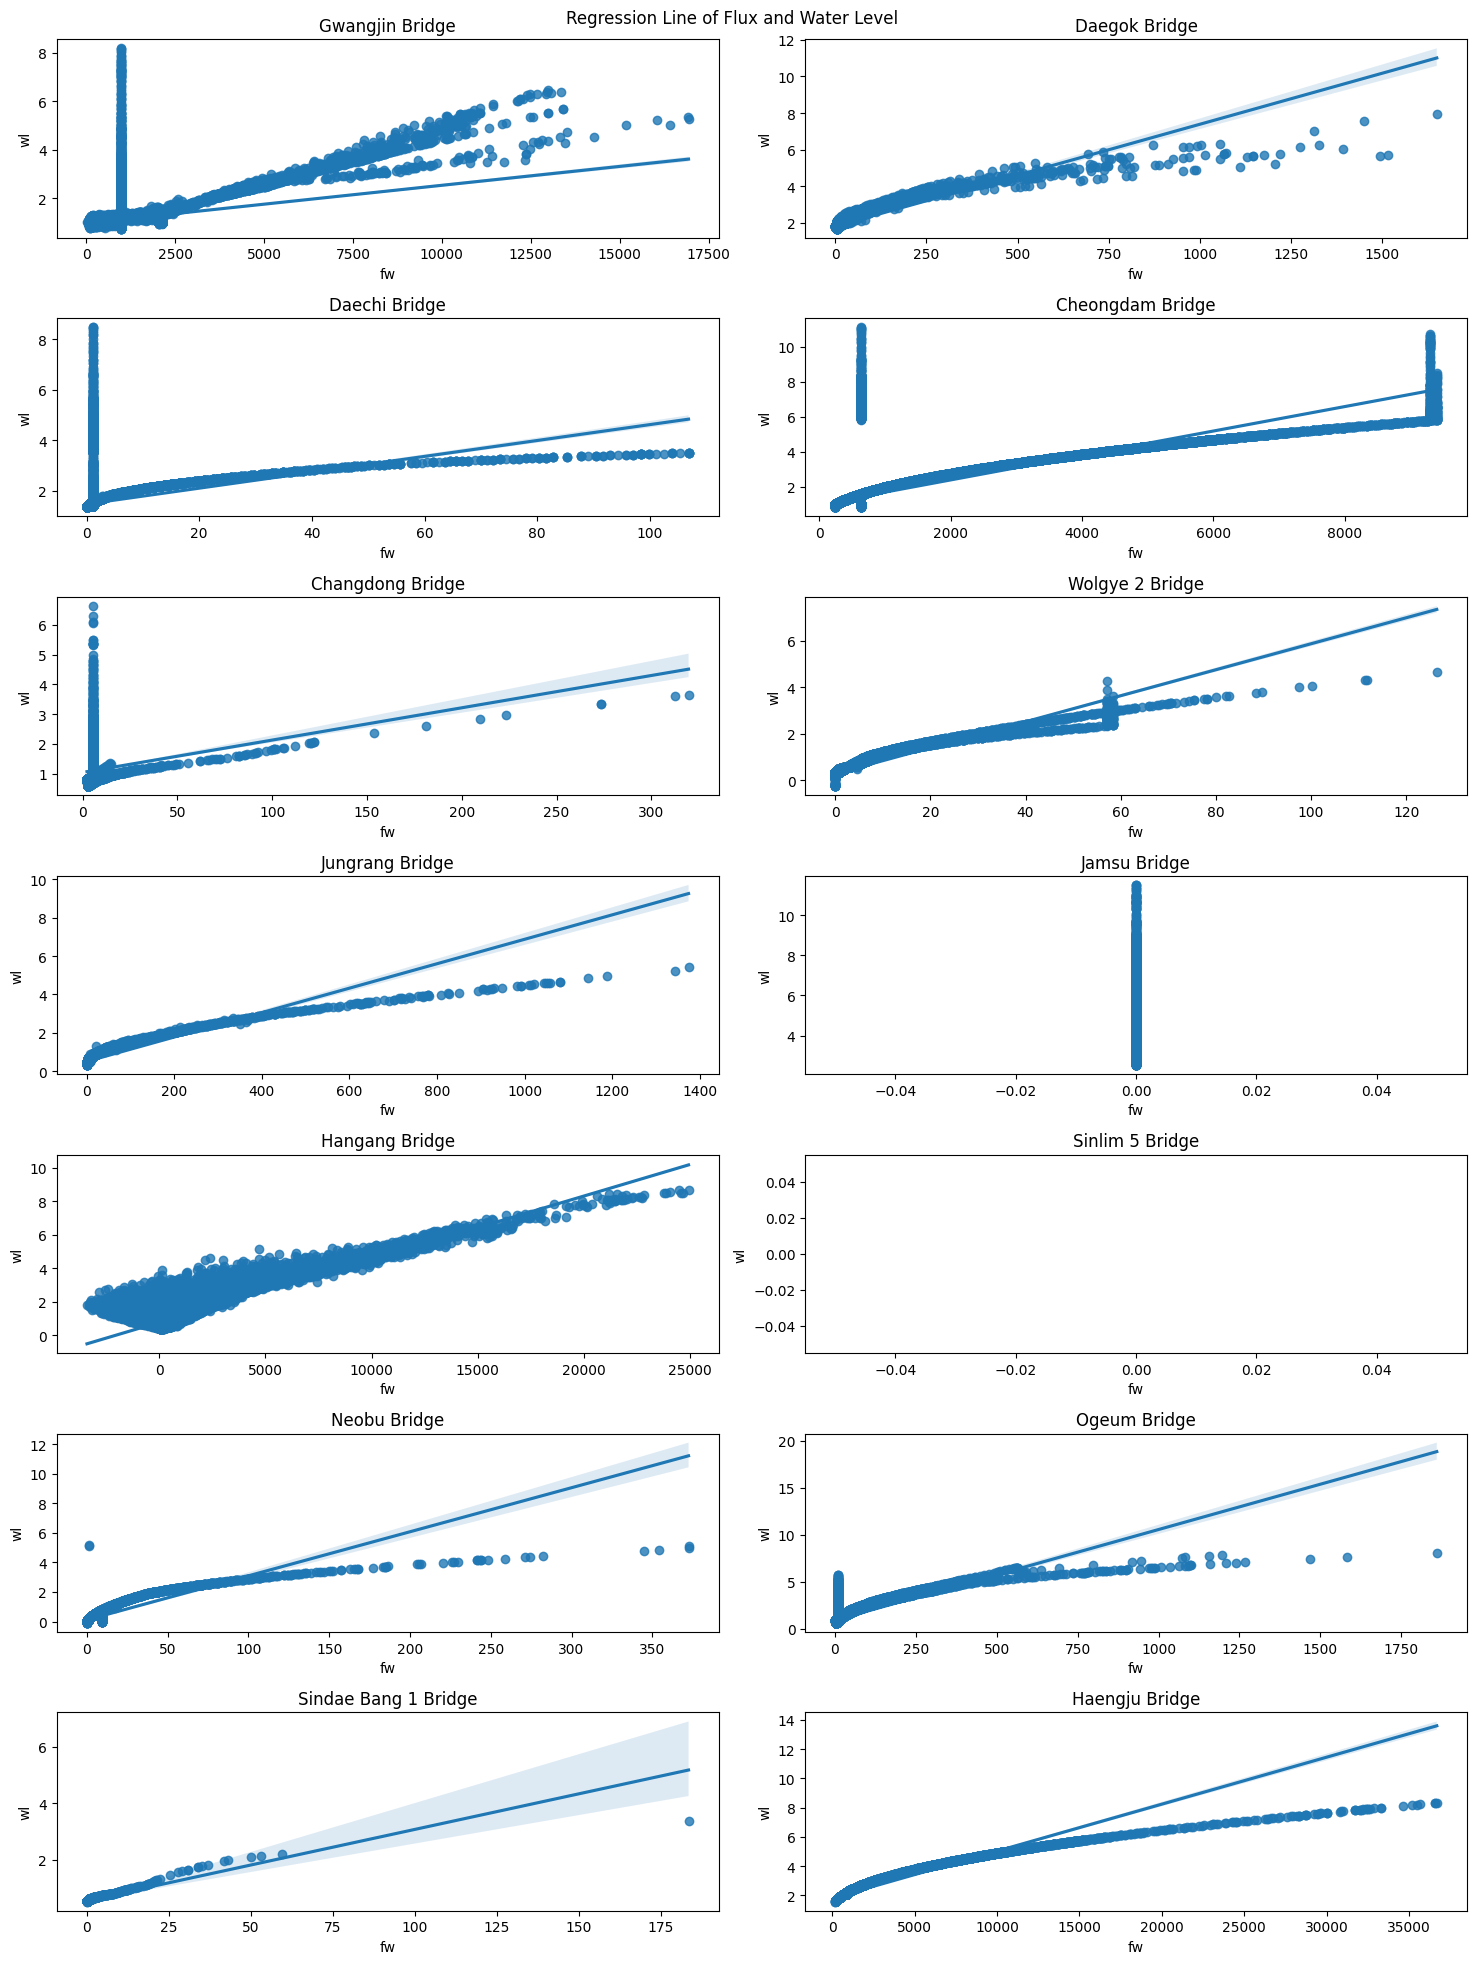

In [ ]:
num_features = len(bridge_names)
num_rows = 7
num_cols = (num_features + num_rows - 1) // num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(bridge_names):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.regplot(x='fw', y='wl', data=df, ax=axes[row, col])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('Regression Line of Flux and Water Level')
plt.tight_layout()
plt.show()

Gwangjin Bridge Complite
Daegok Bridge Complite
Daechi Bridge Complite
Cheongdam Bridge Complite
Changdong Bridge Complite
Wolgye 2 Bridge Complite
Jungrang Bridge Complite
Jamsu Bridge Complite
Hangang Bridge Complite
Sinlim 5 Bridge Complite
Neobu Bridge Complite
Ogeum Bridge Complite
Sindae Bang 1 Bridge Complite
Haengju Bridge Complite


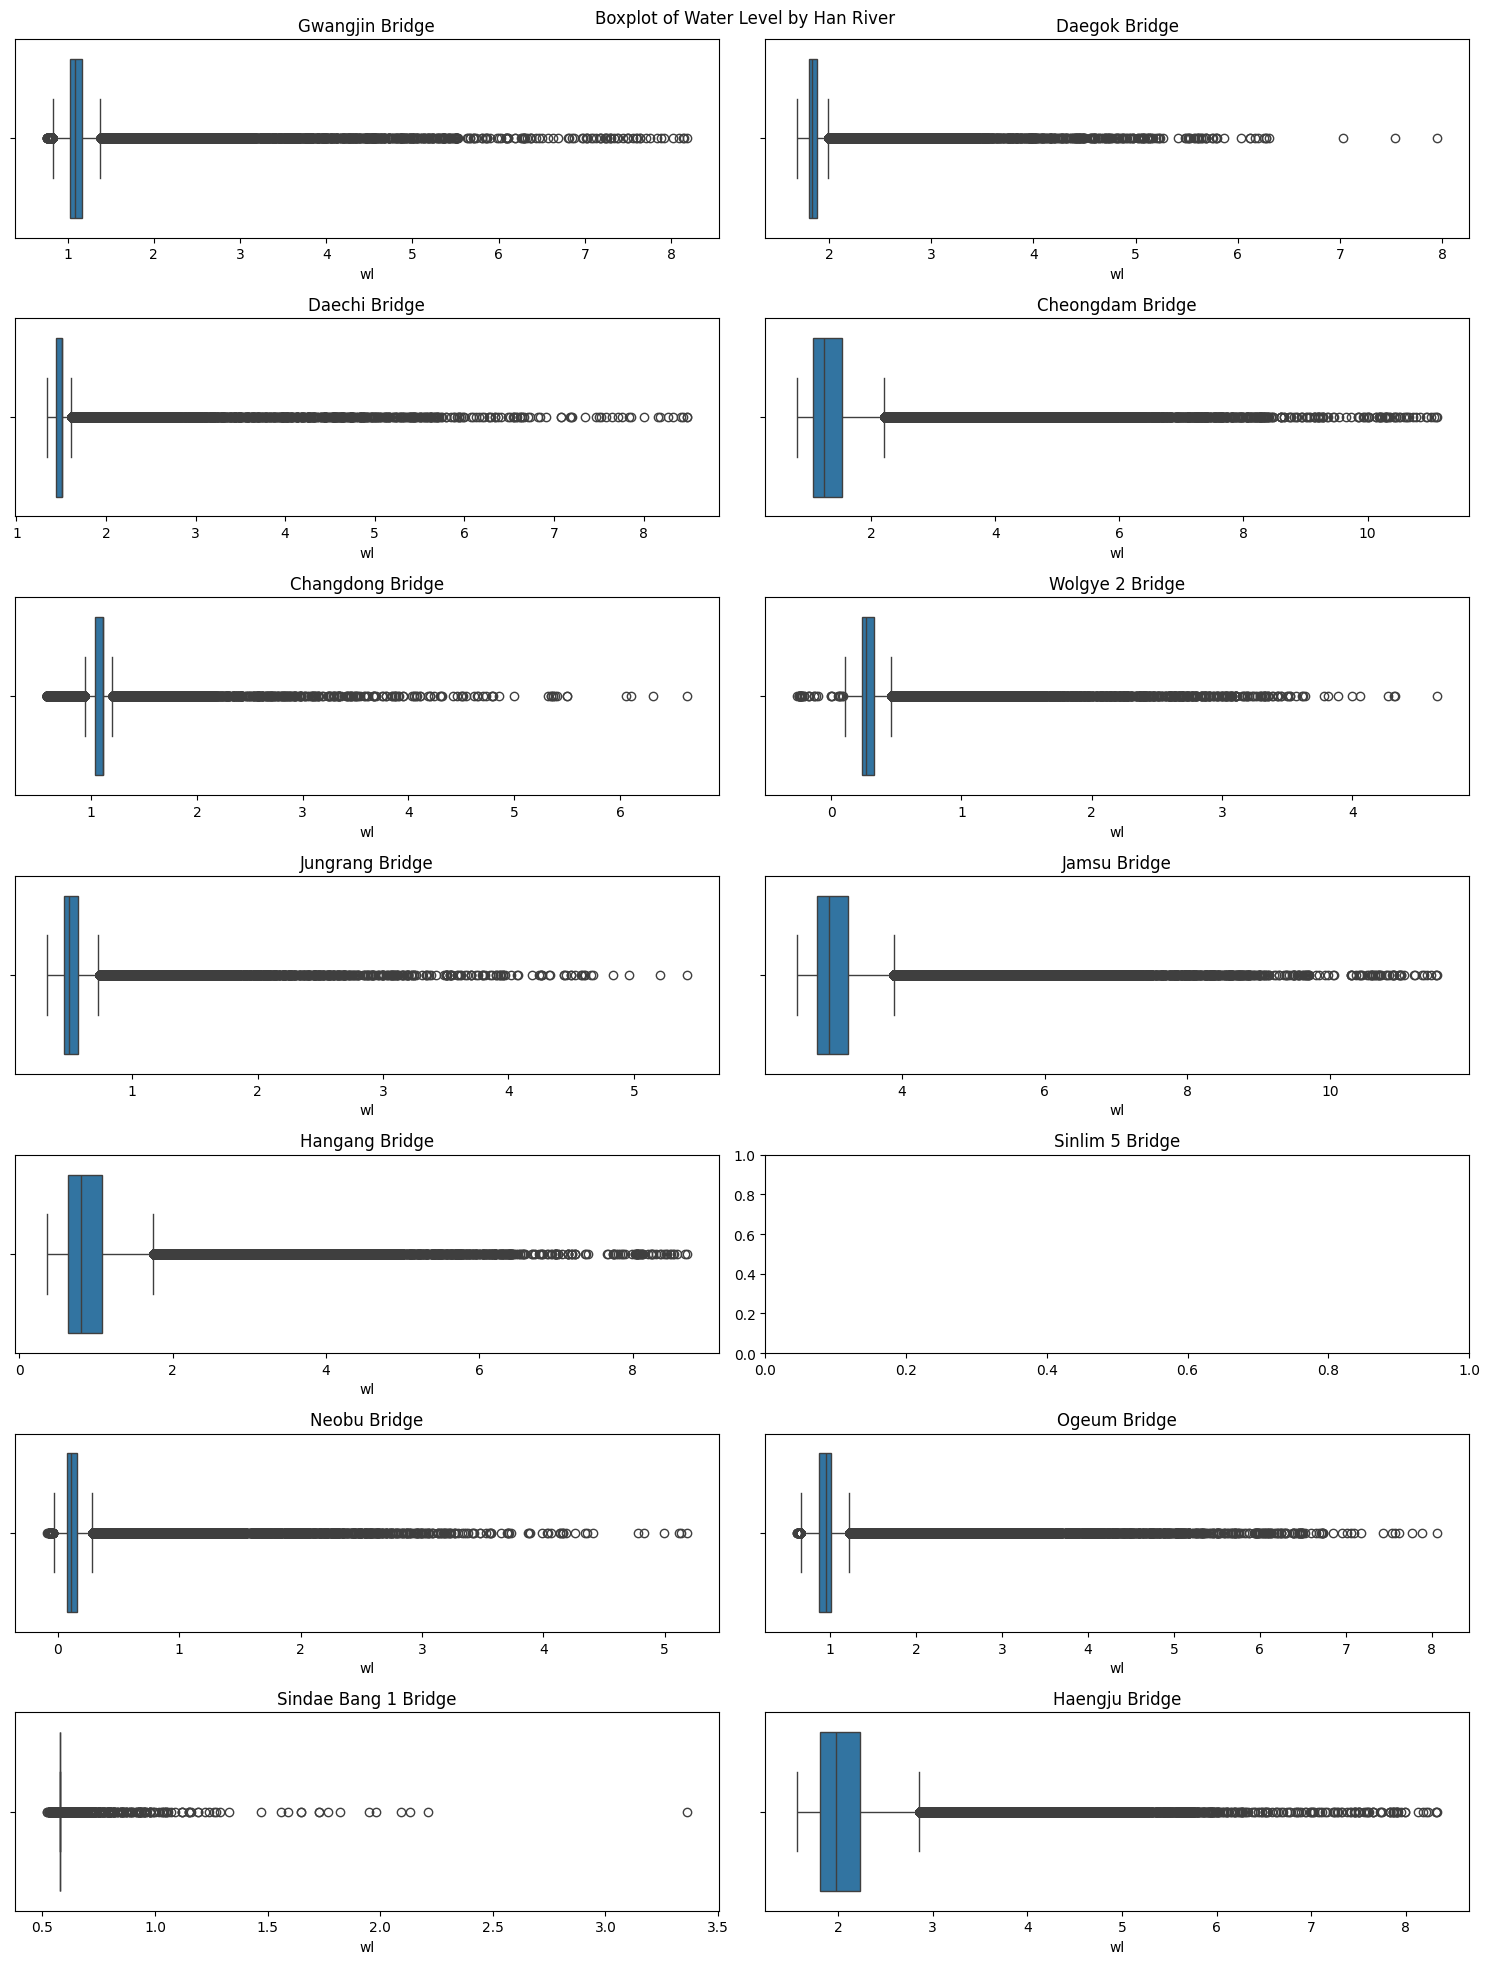

In [ ]:
num_features = len(bridge_names)
num_rows = 7
num_cols = (num_features + num_rows - 1) // num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, bridge in enumerate(bridge_names):
    row = i // num_cols
    col = i % num_cols
    df = data[data['observatory'] == bridge]
    sns.boxplot(x='wl', data=df, ax=axes[row, col])
    axes[row, col].set_title(bridge)
    print(bridge + ' Complite')
plt.suptitle('Boxplot of Water Level by Han River')
plt.tight_layout()
plt.show()

In [ ]:
# 숫자 열만 추출
numeric_columns = data.select_dtypes(include=['number'])

# 상관 계수 계산
correlation_df = numeric_columns.corr()
correlation_df

,fw,wl,wlobscd,ymdhm,rf,year,month,day,hour,precipitation(mm)
fw,1.000000,0.312721,2.530129e-01,-7.781375e-02,NaN,-7.806368e-02,2.913659e-02,-9.392577e-03,-3.442036e-03,1.607506e-01
wl,0.312721,1.000000,2.752245e-01,-3.043956e-02,NaN,-3.071075e-02,3.182532e-02,-9.426912e-03,-1.480121e-03,1.647861e-01
wlobscd,0.253013,0.275224,1.000000e+00,-1.229381e-12,NaN,-5.848413e-12,-2.554006e-13,-1.610041e-14,9.548027e-16,-2.048051e-13
ymdhm,-0.077814,-0.030440,-1.229381e-12,1.000000e+00,NaN,9.999634e-01,8.536583e-03,7.031148e-05,-3.894925e-06,-1.467718e-02
rf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.078064,-0.030711,-5.848413e-12,9.999634e-01,NaN,1.000000e+00,-1.626014e-05,-2.267374e-04,-5.040320e-06,-1.507710e-02
month,0.029137,0.031825,-2.554006e-13,8.536583e-03,NaN,-1.626014e-05,1.000000e+00,9.223522e-03,-6.515132e-05,4.651729e-02
day,-0.009393,-0.009427,-1.610041e-14,7.031148e-05,NaN,-2.267374e-04,9.223522e-03,1.000000e+00,-6.808979e-05,7.341499e-03
hour,-0.003442,-0.001480,9.548027e-16,-3.894925e-06,NaN,-5.040320e-06,-6.515132e-05,-6.808979e-05,1.000000e+00,-1.056803e-05
precipitation(mm),0.160751,0.164786,-2.048051e-13,-1.467718e-02,NaN,-1.507710e-02,4.651729e-02,7.341499e-03,-1.056803e-05,1.000000e+00


<Axes: >

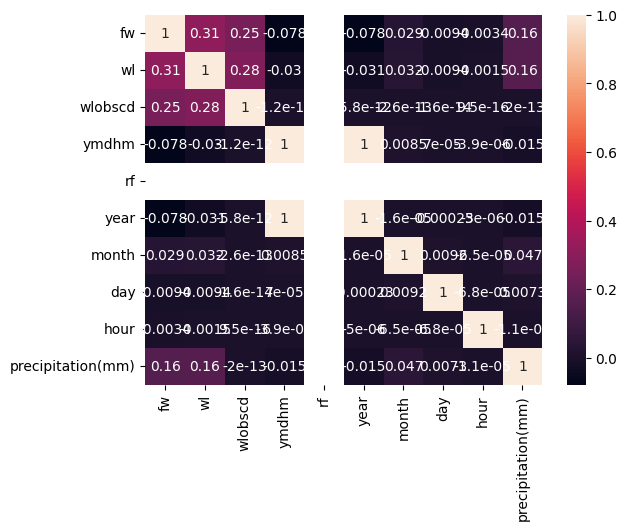

In [ ]:
sns.heatmap(correlation_df, annot=True)